In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential,Model
from keras.layers import Dropout,Dense,Flatten,BatchNormalization,Activation,Input
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils
from matplotlib import pyplot
K.set_image_dim_ordering('tf')

Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

X_train = X_train/255
X_test = X_test/255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]
print("Number of classes " ,num_classes)

Number of classes  10


In [3]:
def r_ann_model():
    Images = Input(shape=(28,28,1))
    flat_n = Flatten()(Images)
    dense1 = Dense(100,activation='relu',kernel_initializer='glorot_uniform')(flat_n)
    drp1 = Dropout(0.3)(dense1)
    dense2 = Dense(200, activation='relu')(drp1)
    drp2 = Dropout(0.3)(dense2)
    dense3 = Dense(100,activation='relu')(drp2)
    drp3 = Dropout(0.3)(dense3)
    dense4 = Dense(10,activation='relu')(drp3)
    dropout = Dropout(0.3)(dense4)
    dense5 = Dense(num_classes,activation='softmax')(dropout)
    model = Model(inputs=Images,outputs=dense5)
    model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model

In [4]:
reluu = r_ann_model()
print(reluu.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
__________

In [5]:
history = reluu.fit(X_train,y_train,validation_split=0.2,epochs=100,batch_size=64)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s - loss: 1.0581 - acc: 0.6299 - val_loss: 0.3082 - val_acc: 0.9243
Epoch 2/100
48000/48000 [==============================] - 2s - loss: 0.5881 - acc: 0.8099 - val_loss: 0.2149 - val_acc: 0.9466
Epoch 3/100
48000/48000 [==============================] - 2s - loss: 0.5100 - acc: 0.8365 - val_loss: 0.1837 - val_acc: 0.9560
Epoch 4/100
48000/48000 [==============================] - 2s - loss: 0.4508 - acc: 0.8595 - val_loss: 0.1762 - val_acc: 0.9583
Epoch 5/100
48000/48000 [==============================] - 2s - loss: 0.4254 - acc: 0.8658 - val_loss: 0.1779 - val_acc: 0.9598
Epoch 6/100
48000/48000 [==============================] - 2s - loss: 0.3870 - acc: 0.8828 - val_loss: 0.1689 - val_acc: 0.9642
Epoch 7/100
48000/48000 [==============================] - 2s - loss: 0.3691 - acc: 0.8905 - val_loss: 0.1574 - val_acc: 0.9652
Epoch 8/100
48000/48000 [=============================

48000/48000 [==============================] - 2s - loss: 0.2011 - acc: 0.9479 - val_loss: 0.1526 - val_acc: 0.9738
Epoch 65/100
48000/48000 [==============================] - 2s - loss: 0.1980 - acc: 0.9489 - val_loss: 0.1521 - val_acc: 0.9731
Epoch 66/100
48000/48000 [==============================] - 2s - loss: 0.1956 - acc: 0.9482 - val_loss: 0.1452 - val_acc: 0.9748
Epoch 67/100
48000/48000 [==============================] - 2s - loss: 0.1972 - acc: 0.9472 - val_loss: 0.1537 - val_acc: 0.9745
Epoch 68/100
48000/48000 [==============================] - 2s - loss: 0.2049 - acc: 0.9467 - val_loss: 0.1756 - val_acc: 0.9710
Epoch 69/100
48000/48000 [==============================] - 2s - loss: 0.2041 - acc: 0.9464 - val_loss: 0.1528 - val_acc: 0.9742
Epoch 70/100
48000/48000 [==============================] - 2s - loss: 0.1967 - acc: 0.9483 - val_loss: 0.1659 - val_acc: 0.9748
Epoch 71/100
48000/48000 [==============================] - 2s - loss: 0.1979 - acc: 0.9507 - val_loss: 0.1493

In [6]:
print("Acc: ",history.history['acc'][-1])
print("Val_acc: ",history.history['val_acc'][-1])
print("Loss: ",history.history['loss'][-1])
print("Val_loss: ",history.history['val_loss'][-1])

Acc:  0.9541875
Val_acc:  0.974916666667
Loss:  0.176150915953
Val_loss:  0.139142434794


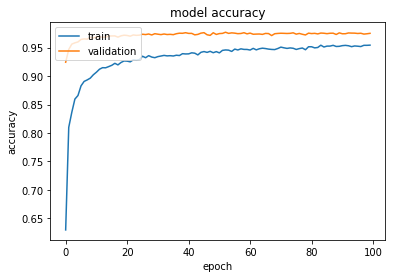

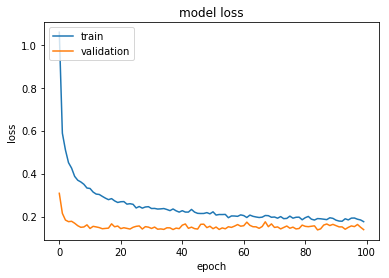

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])

plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
#import numpy as np
#Score = reluu.predict(X_test)
#print(Score.shape)
evl = reluu.evaluate(X_test,y_test,batch_size=32,verbose=1)
print(evl)

(10000, 10)
 9504/10000 [===========================>..] - ETA: 0s[0.14826515891756861, 0.97550000000000003]


In [9]:
#classes = np.argmax(Score[9])
#print(classes)

9


In [10]:
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

def swish(x):
    return x * K.sigmoid(x)

get_custom_objects().update({'swish': Activation(swish)})

In [17]:
def s_ann_model():
    Images = Input(shape=(28,28,1))
    flat_n = Flatten()(Images)
    dense1 = Dense(100,activation='swish',kernel_initializer='glorot_uniform')(flat_n)
    drp1 = Dropout(0.3)(dense1)
    dense2 = Dense(200, activation='swish')(drp1)
    drp2 = Dropout(0.3)(dense2)
    dense3 = Dense(100,activation='swish')(drp2)
    drp3 = Dropout(0.3)(dense3)
    dense4 = Dense(10,activation='swish')(drp3)
    dropout = Dropout(0.3)(dense4)
    dense5 = Dense(num_classes,activation='softmax')(dropout)
    model = Model(inputs=Images,outputs=dense5)
    model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model

In [18]:
swish = s_ann_model()
print(swish.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 200)               20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               20100     
__________

In [19]:
history = swish.fit(X_train,y_train,validation_split=0.2,epochs=100,batch_size=64)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s - loss: 0.8550 - acc: 0.7241 - val_loss: 0.2394 - val_acc: 0.9388
Epoch 2/100
48000/48000 [==============================] - 2s - loss: 0.5016 - acc: 0.8445 - val_loss: 0.1659 - val_acc: 0.9558
Epoch 3/100
48000/48000 [==============================] - 2s - loss: 0.4163 - acc: 0.8776 - val_loss: 0.1447 - val_acc: 0.9616
Epoch 4/100
48000/48000 [==============================] - 2s - loss: 0.3673 - acc: 0.8940 - val_loss: 0.1380 - val_acc: 0.9649
Epoch 5/100
48000/48000 [==============================] - 2s - loss: 0.3345 - acc: 0.9059 - val_loss: 0.1356 - val_acc: 0.9656
Epoch 6/100
48000/48000 [==============================] - 2s - loss: 0.3014 - acc: 0.9151 - val_loss: 0.1228 - val_acc: 0.9698
Epoch 7/100
48000/48000 [==============================] - 2s - loss: 0.2765 - acc: 0.9251 - val_loss: 0.1156 - val_acc: 0.9707
Epoch 8/100
48000/48000 [=============================

48000/48000 [==============================] - 2s - loss: 0.0942 - acc: 0.9782 - val_loss: 0.1375 - val_acc: 0.9786
Epoch 65/100
48000/48000 [==============================] - 2s - loss: 0.0923 - acc: 0.9791 - val_loss: 0.1329 - val_acc: 0.9764
Epoch 66/100
48000/48000 [==============================] - 2s - loss: 0.0922 - acc: 0.9772 - val_loss: 0.1262 - val_acc: 0.9783
Epoch 67/100
48000/48000 [==============================] - 2s - loss: 0.0852 - acc: 0.9789 - val_loss: 0.1219 - val_acc: 0.9783
Epoch 68/100
48000/48000 [==============================] - 2s - loss: 0.0858 - acc: 0.9797 - val_loss: 0.1462 - val_acc: 0.9772
Epoch 69/100
48000/48000 [==============================] - 2s - loss: 0.0945 - acc: 0.9778 - val_loss: 0.1287 - val_acc: 0.9780
Epoch 70/100
48000/48000 [==============================] - 2s - loss: 0.0948 - acc: 0.9770 - val_loss: 0.1297 - val_acc: 0.9775
Epoch 71/100
48000/48000 [==============================] - 2s - loss: 0.0881 - acc: 0.9788 - val_loss: 0.1166

In [20]:
print("Acc: ",history.history['acc'][-1])
print("Val_acc: ",history.history['val_acc'][-1])
print("Loss: ",history.history['loss'][-1])
print("Val_loss: ",history.history['val_loss'][-1])

Acc:  0.981708333333
Val_acc:  0.976583333333
Loss:  0.077251359703
Val_loss:  0.131722370075


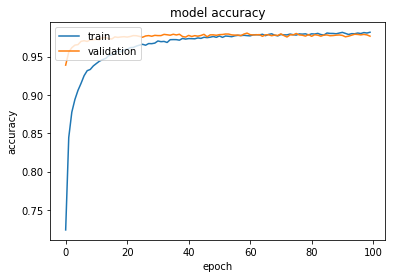

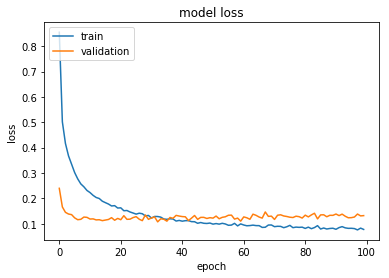

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])

plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
#import numpy as np
#Score = swish.predict(X_test)
#print(Score.shape)
evl = swish.evaluate(X_test,y_test,batch_size=32,verbose=1)
print(evl)
#classes = np.argmax(Score[9])
#print(classes)

 8768/10000 [=========================>....] - ETA: 0s[0.12337125824114628, 0.97870000000000001]
